# HW2 Chenyu Wang

## Preparation

### Definition

I : Sample1 : 2/1/2012 to 6/30/2015
II: WFLY : 3Y*w1-5Y+7Y*w2 weights = (w1, -1, w2)

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm

## Q2

### a.	Download a panel of CMT rates into pandas dataframe & remove ‘1M column from the dataset

In [2]:
data = pd.read_csv('CMT_Rates.csv', index_col = 'Date')
data.drop(columns = ['1 MO'], inplace = True)
sample1 = data['12/2/1':'15/6/30']

### b.	Perform PCA on the dataset using Sample1

In [3]:
## compute the daily changes
sample1_diff = sample1.diff().dropna()

print(sample1_diff.head())
print(sample1_diff.tail())

        3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                 
12/2/2  0.02  0.01  0.01  0.00  0.00 -0.01 -0.02  -0.01  -0.01   0.00
12/2/3  0.00  0.00  0.00  0.00  0.02  0.07  0.10   0.11   0.12   0.12
12/2/6  0.00  0.00  0.00  0.01 -0.01 -0.02 -0.03  -0.04  -0.05  -0.05
12/2/7  0.00  0.01  0.00  0.01  0.03  0.06  0.07   0.07   0.07   0.06
12/2/8  0.01  0.00  0.01  0.02  0.00  0.00  0.00   0.01   0.00   0.00
         3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  20 YR  30 YR
Date                                                                  
15/6/24  0.00 -0.01  0.00 -0.02 -0.01 -0.02 -0.02  -0.04  -0.05  -0.04
15/6/25  0.00 -0.01 -0.01  0.00  0.00  0.01  0.02   0.02   0.01   0.00
15/6/26  0.00  0.01  0.00  0.04  0.03  0.05  0.06   0.09   0.10   0.09
15/6/29  0.01  0.03 -0.02 -0.08 -0.09 -0.13 -0.15  -0.16  -0.16  -0.16
15/6/30 -0.01  0.00  0.01  0.00  0.01  0.01  0.02   0.02   0.01   0.02


In [4]:
## perform PCA by sklearn
pca = PCA(n_components = len(sample1.columns))
pca.fit(sample1_diff)
f = pca.components_
var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4))
print("% Variance explained:")
print(var_ratio)

% Variance explained:
[0.8758 0.9515 0.9656 0.9763 0.9826 0.988  0.9922 0.9953 0.9977 0.9999]


In [5]:
## Perform PCA by custom
### Minus mean()
sample1_diff_zero = sample1_diff - sample1_diff.mean()
### Calculate covariance
c_matrix = sample1_diff_zero.cov()
### calculate eigenvector and eigenvalue
val, vec = np.linalg.eig(c_matrix)
### calculate explained ratio
tr = sum(val)
var_ratio_custom = np.cumsum(np.round(val/tr, decimals = 4))
print("% Variance explained custom")
print(var_ratio_custom)

% Variance explained custom
[0.8758 0.9515 0.9656 0.9763 0.9826 0.988  0.9922 0.9953 0.9975 0.9999]


### c.	Use this PCA model to analyze the CMT curve move on the Election Day: 11/8/2016 to 11/9/2016

In [6]:
### Get the change of from 11/8/2016 to 11/9/2016
CMT_curve_move = data.loc['16/11/9']-data.loc['16/11/8']

In [7]:
### Get the top PCA explained data
##PCA 1
PCA1 = CMT_curve_move @ vec[:,:1] @ vec[:,:1].T
##PCA 2
PCA2 = CMT_curve_move @ vec[:,:2] @ vec[:,:2].T
##PCA 3
PCA3 = CMT_curve_move @ vec[:,:3] @ vec[:,:3].T

i.	Plot CMT curve move vs the move explained by the first PCA factor, first 2 PCA factors, first 3 PCA factors

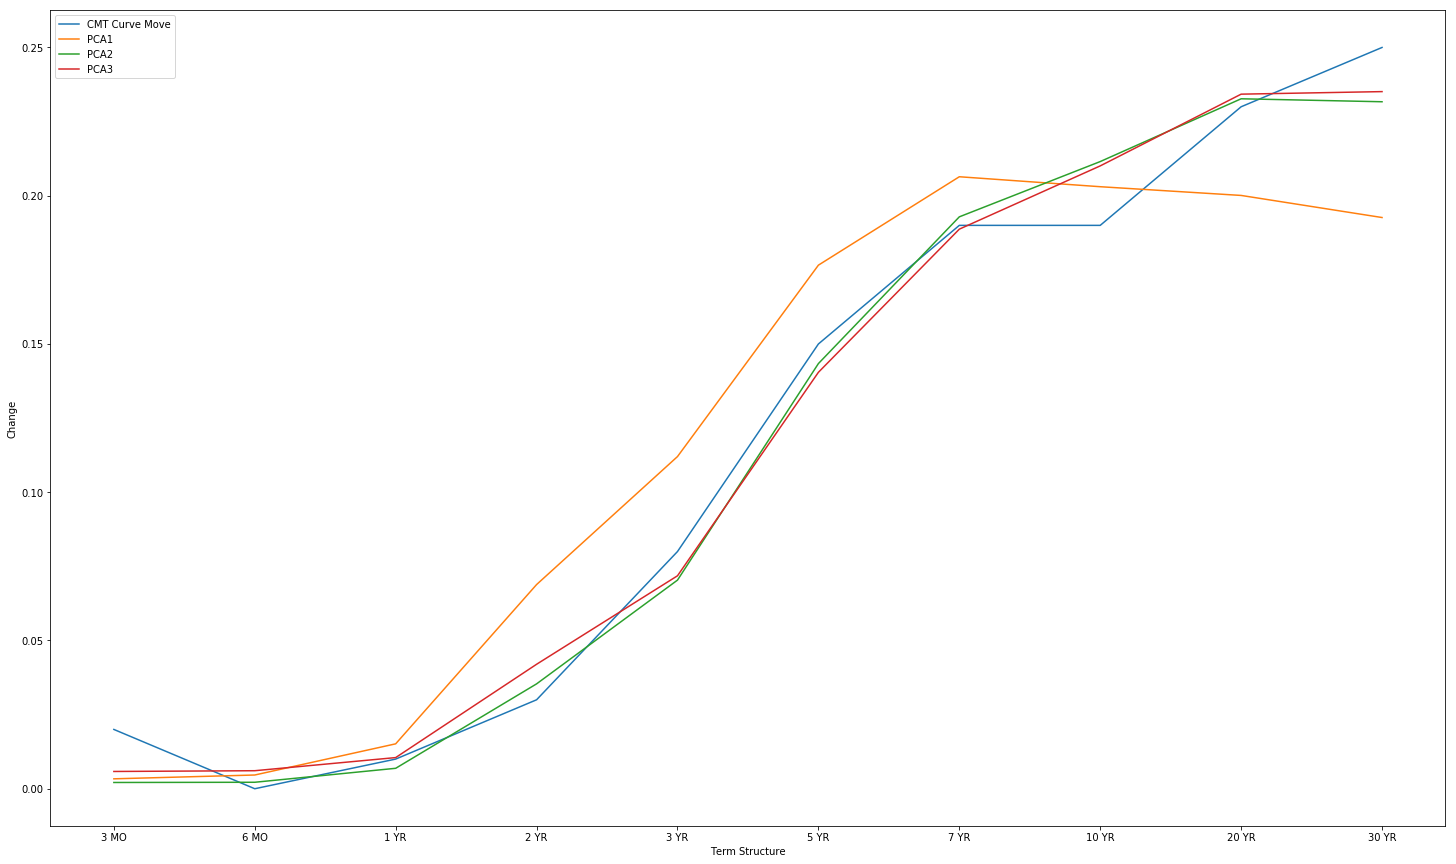

In [8]:
### Plot the two curve together
x = data.columns.values
plt.figure(figsize = (25,15))
plt.plot(x, CMT_curve_move, label = "CMT Curve Move")
plt.plot(x, PCA1, label = "PCA1")
plt.plot(x, PCA2, label = "PCA2")
plt.plot(x, PCA3, label = "PCA3")
plt.xlabel('Term Structure')
plt.ylabel('Change')
plt.legend()
plt.show()

ii.	Explain your calculations and results

### Explain Calculations
Let's suppose X is the data(m*k matrix), Q is the eigenvector matrix. If we compute X*Q, tthe result is the data that is transformed by PCA. If we use first two columns of Q, we call it Q1, we compute X*Q1. It means that the data's dimonsion is reduced to 2 dimensions. Here, if we multiply the transpose matrix of Q1, it means we retransform the dataset into k dimensions. We can think this process in an intuitive way that we just take off all other information of the dataset except factor1 and factor 2. ( This could be easily understood if we think about X*Q*Q^T = X). 

So, in this way, we compute the new line of PCA1, PCA2, PCA3 by reduced the dimension to 1, 2, 3 respectively and then multiply a transpose matirx in order to restore the data(leave only the information we want).

### Explain Result
Result 1: PCA3 "fit" best

We can see in the graph that PCA3 is the one best "fit" the real CMT curve movement while PCA1 is the worst one. It's very easy to understand that PCA3 has a higher explained variance ratio. 

Result 2: Short term fit well, Mid term similar and long term the worst

From the graph we can find that at the short term, PCA1, PCA2 and PCA3 capture the movement of CMT well. This is because that the monetary policy in the short term is much more predictable. In mid term and long term, there are more controversial viewpoints and it's much more difficult to predict. Our principal components cannot capture enough information to show the pattern.

### d.	Compute weights of the WFLY to make sure that WFLY does not have PCA1,2 risk exposure in Sample1.  Let’s call this combination WFLY1

In [9]:
A = vec[[4,6],:2].T
B = vec[5,:2].T
w1, w2 = np.linalg.solve(A,B)
w1,w2

(0.6298498832434606, 0.5136612380614491)

In [10]:
weights = [w1, -1, w2]
print("The weights of WFLY1 is", weights)

The weights of WFLY1 is [0.6298498832434606, -1, 0.5136612380614491]


### e.	Choose weights of the WFLY from cointegration analysis (weights correspond to the best cointegrated vector).  Let’s call this combination WFLY2

### Method 1 : CCA Chou_Ng

In [11]:
def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C

In [12]:
### Extract data
df1 = sample1[['3 YR', '5 YR', '7 YR']]
### Fit CCA_Chou_Ng
val, vec, C = CCA_Chou_Ng(df1)
### Show the vector
n = len(df1.columns)
vec = pd.DataFrame(vec)
vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
print (vec)
### Select the best
w = vec[2].values
w_cca_cn = [-w[0]/w[1],-w[2]/w[1]]
print (w_cca_cn)

          2         1         0
0  0.483341 -0.230374 -0.829354
1 -0.755827 -0.738025  0.358722
2  0.441709  0.634230  0.428357
[0.6394853383509581, 0.5844048010737962]


/Users/chenyuwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/chenyuwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
val

array([0.76417648, 0.98934637, 0.99057681])

In [14]:
Weights_2 = [w_cca_cn[0], -1, w_cca_cn[1]]
print("The weight of WFLY2 ChouNg is", Weights_2)

The weight of WFLY2 ChouNg is [0.6394853383509581, -1, 0.5844048010737962]


### Model 2 : Box & Tiao

In [15]:
def Box_Tiao(data):
    ### Prepare data
    df = data - data.mean()
    df1 = df.drop(df.index[0])
    df2 = df.shift().dropna()
    ### Calculate A
    A = (sm.OLS(df1.as_matrix(), df2.as_matrix()).fit()).params
    ### Calculate Q
    cov = df.cov()
    Q = np.dot(np.dot(np.dot(np.linalg.inv(cov), A), cov),A.T)
    ### calculate Eigenvector and Eigenvalue
    val, vec = np.linalg.eig(Q)
    
    return val, vec

In [16]:
### Get Eigenvalues and Eigenvectors
val, vec = Box_Tiao(df1)
### Show the Eigenvectors
vec = pd.DataFrame(vec)
vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
print (vec)
### Calculate the weight
w = vec[2].values
w_cca_BT = [-w[0]/w[1],-w[2]/w[1]]
print (w_cca_BT)

          2         1         0
0  0.479770 -0.775129  0.620224
1 -0.757941 -0.187055 -0.358469
2  0.441979  0.603478  0.697726
[0.6329908442507073, 0.5831311232226802]


/Users/chenyuwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [17]:
val

array([6.55950426e+02, 9.92244505e-01, 1.15073414e-03])

In [18]:
Weights_3 = [w_cca_BT[0], -1, w_cca_BT[1]]
print("The weight of WFLY2 Box & Tiao is", Weights_3)

The weight of WFLY2 Box & Tiao is [0.6329908442507073, -1, 0.5831311232226802]


## Q3

### Compute Half-Life & ADF statistic for WFLY2 using Sample1

In [19]:
### construct the portfolio by CCA_Chou_Ng
portfolio = w_cca_cn[0]*sample1.loc[:,'3 YR'] - sample1.loc[:,'5 YR'] + w_cca_cn[1]*sample1.loc[:,'7 YR']

In [20]:
### Compute ADF sttatistic for WFLY2
from statsmodels.tsa.stattools import adfuller
def run_adf_test(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['statistic','p-value','n_lags','n_obs'])
    for key,value in dftest[4].items():
        dfoutput['critical_Val (%s)'%key] = value
    print(dfoutput)
run_adf_test(portfolio)

statistic              -4.915617
p-value                 0.000033
n_lags                  3.000000
n_obs                 851.000000
critical_Val (1%)      -3.438058
critical_Val (5%)      -2.864942
critical_Val (10%)     -2.568582
dtype: float64


Therefore, the p-value reject non-stationary at 1% level, so the series could be stationary

### Compute Half-Life 
In the paper, we assume they follow an Ornstein-Uhlenbeck process and the parameter lambda is computed as the fomula showed in Appendix. We can compute the half-life:
$$
h = -\frac{ln(2)}{ln(|\lambda|)}
$$

In [51]:
def Half_Life(ts):
    ### Get y_t
    ts_shift = ts.drop(ts.index[0])
    ### Get y_t-1
    ts_back = ts.drop(ts.index[len(ts)-1])
    ### Compute mean(miu)
    miu = ts_shift.mean()
    ### Compute up
    ser1 = np.array(ts_shift - miu)
    ser2 = np.array(ts_back - miu)
    up = 0
    for i in range(len(ser1)):
        up = up + ser1[i]*ser2[i]
    ### Compute down
    down = 0
    for i in range(len(ser2)):
        down = down + ser1[i]*ser1[i]
    ### Compute lambda
    lam = -np.log(up/down)
    ### Compute half-life
    h = np.log(2)/lam
    return h

In [52]:
h = Half_Life_p(portfolio)
print('The half_life of WFLY2 is', float(h))

The half_life of WFLY2 is 5.13148171192584


## Q4

### Repeat Step #3 out-of-sample: using 3m, 6m, 12m out of sample periods

In [31]:
### Get 12 month out of sample period
m_12 = w_cca_cn[0]*data.loc['15/7/1':'16/6/30','3 YR'] - data.loc['15/7/1':'16/6/30','5 YR'] + w_cca_cn[1]*data.loc['15/7/1':'16/6/30','7 YR']
### Get 3 month and 6 month period
m_3 = m_12.loc['15/7/1':'15/9/30']
m_6 = m_12.loc['15/7/1':'15/12/31']

### Using 3m data 

In [32]:
run_adf_test(m_3)

statistic             -1.615530
p-value                0.475073
n_lags                 2.000000
n_obs                 61.000000
critical_Val (1%)     -3.542413
critical_Val (5%)     -2.910236
critical_Val (10%)    -2.592745
dtype: float64


The 3m out-of-sample series does not reject the non-stationary hypothesis. So the Series in non-stationary

In [53]:
h_3m = Half_Life(m_3)
print('The half_life of 3m out of sample WFLY2 is', float(h_3m))

The half_life of 3m out of sample WFLY2 is 4.691434622252598


### Using 6m data

In [34]:
run_adf_test(m_6)

statistic              -0.983976
p-value                 0.759064
n_lags                  2.000000
n_obs                 123.000000
critical_Val (1%)      -3.484667
critical_Val (5%)      -2.885340
critical_Val (10%)     -2.579463
dtype: float64


The 6-month out of sample series does not reject the non-stationary hypothesis. So the Series is non-stationary.

In [54]:
h_6m = Half_Life(m_6)
print('The half_life of 6m out of sample WFLY2 is', float(h_6m))

The half_life of 6m out of sample WFLY2 is 12.400072567245722


### Using 12m data

In [36]:
run_adf_test(m_12)

statistic              -1.708992
p-value                 0.426486
n_lags                  2.000000
n_obs                 248.000000
critical_Val (1%)      -3.456996
critical_Val (5%)      -2.873266
critical_Val (10%)     -2.573019
dtype: float64


The 12 month out of sample series does not reject the non-stationary hypothsis. So the series is non-stationary

In [55]:
h_12m = Half_Life(m_12)
print('The half_life of 12m out of sample WFLY2 is', float(h_12m))

The half_life of 12m out of sample WFLY2 is 8.095233438621186


### How do out-of-sample results compare across periods and combinations?

From the result above, we can easily find that all out of sample series are not stationary. If we use 3-month out of sample data, the half-life is similar to in sample data's half-life. However, if we use 6 month, 12 month, the half-life could be different from in sample one.

One of the most important reasons is that the term-structure (we can think it as a pattern) is not stable. The term-structure could be affected by the policies and many other macro factors. So, the term-structuer shown in in-sample data cannot illustrate the term-structure in the future. So, we could see that 3 month out of sample's half-life is similar to the in sample data's half life. Because in the short term, the term-structure( the pattern) will not change too much, to some extent, it's predictable. However, in a long run, the pattern will not be stable.

## Q5 Read d’Aspremont’s paper: Identifying Small Mean-Reverting Portfolios

### a.	Explain the rationale for sparse decomposition algorithms

Previously, classical solutions include cointegration or canonical correlation analysis are used to detect mean reversion and construct portfolios to gain profit in the market. But there are two significant shortcomings of these methods: 

First: the mean reversion portfolio they identify is dense. However, in reality, in order to reach this condition, there would be considerable transaction costs. 

Second: from an econometric point of view, this also impacts the interpretability of the resulting portfolio and the significance of the structual relationships it highlights.

Third: optimal mean reverting portfoloios often behave like noise and sometimes vary well inside bid-ask spreads, hence do not form meaningful statistical opportunities.

So here, the author introduce methods of how to seek sparse portfolios instead.

The core of the sparse decomposition algotithms is to maximize :
$$
\lambda^{max}(A,B) = max \frac{x^T Ax}{x^T Bx}
$$
with the subjection:
$$
Card(x)<= k  ,where ||x|| = 1
$$

In this paper, the author use 2 efficient techniques to get a good approximate solutions. One is Greedy Search and the other one is Semidifinite relaxation.

For Greedy search, the first step is to compute the condition k = 1. Next step is to search for the maximum when k =2 which could be solved as a generalized eigenvalue problem. The, repeat the process until k = n. This recursive process provide the final solution.

For Semidefinite relaxation, first, we change the subjection in order to turn it into a quasi-convex program. And this semidefinite program can be solved by SEDUMI.

### b.	Describe & compare results in Figures 1 and 6

### Consider the mean-reversion coefficient
In Box & Tiao's non-sparse portfolios, mean reversion coefficient is -1 when k =1 and reach 252 when k = 8. However, in sparse porttfolios, mean reversion coefficient reach 252 earlier when k =7 and it's very easy to observe that when k is the same, mean reversion coefficient is much larger than tthe one in Box & Tiao's approach.

### Consider the profit
The best portfolio under Box & Tiao's approach is when k = 2 and k =4. The profit is about 1~1.3. However, the best portfolio of sparse one is when k = 1 and the profit is over 6. We can also find that when k is under 4, sparse portfolios always performs better than portfolios under Box & Tiao's method. What's more, when k = 8, the two method provide the same portfolio. This result shows that when there are two many assets in the portfolio, the transaction cost and cost caused by illiquidity cannot be ignored which is correspond to what the author talked at the beginning of the paper ( Why we construct sparse portfolio)